In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('ap.csv')

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data['Month']=pd.to_datetime(data['Month'])

In [5]:
data=data.set_index(['Month'])

In [6]:
data.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

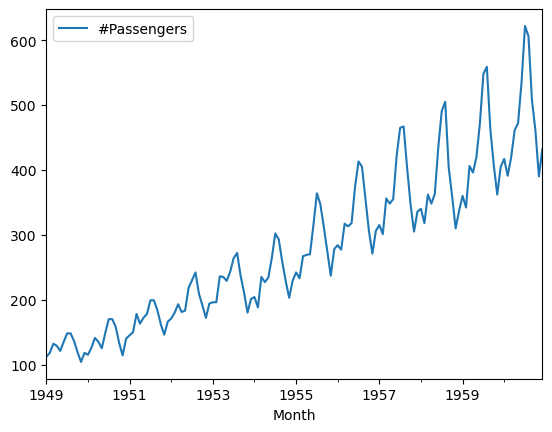

In [7]:
data.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
result=adfuller(data)

In [10]:
result

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [11]:
print("adf statistic",result[0])
print("p value",result[1])
print("n lags",result[2])

adf statistic 0.8153688792060423
p value 0.9918802434376409
n lags 13


In [12]:
mean_rolling=data.rolling(12).mean()

In [13]:
std_rolling=data.rolling(12).std()

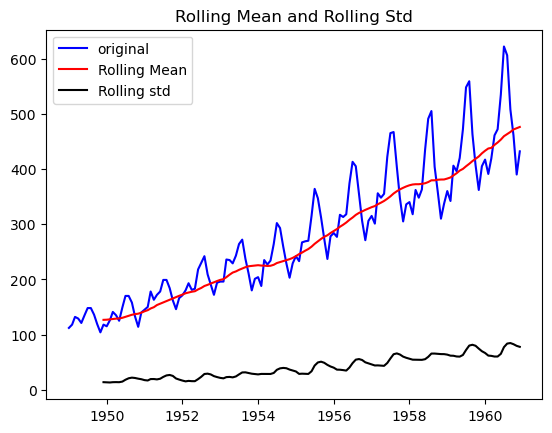

In [14]:
plt.plot(data,color='blue',label='original')
plt.plot(mean_rolling,color='red',label='Rolling Mean')
plt.plot(std_rolling,color='black',label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [15]:
first_log=np.log(data)

In [16]:
first_log=first_log.dropna()

In [17]:
mean_log=first_log.rolling(12).mean()
std_log=first_log.rolling(12).std()

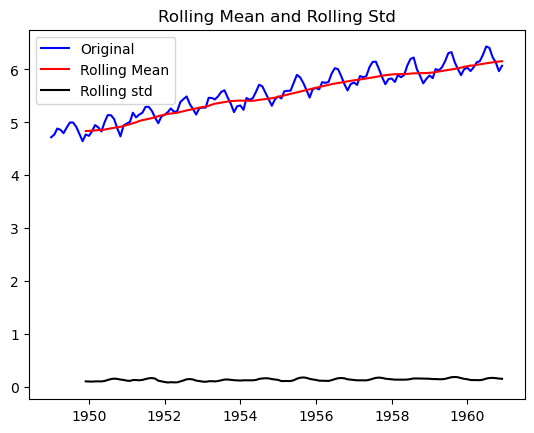

In [18]:
plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')

plt.legend()
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [19]:
newdata=first_log-mean_log

In [20]:
newdata=newdata.dropna()

In [21]:
mean_new_data=newdata.rolling(12).mean()
std_new_data=newdata.rolling(12).std()

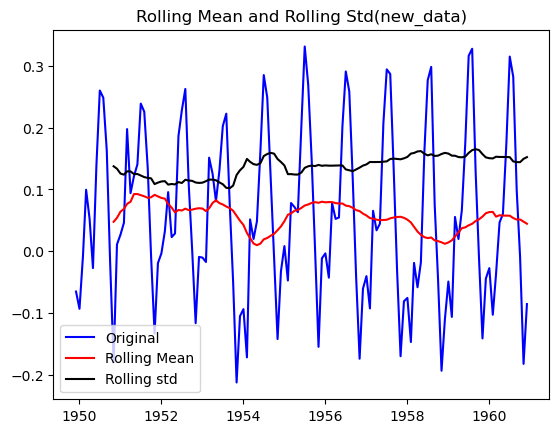

In [22]:
plt.plot(newdata,color='blue',label='Original')
plt.plot(mean_new_data,color='red',label='Rolling Mean')
plt.plot(std_new_data,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std(new_data)')
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
result1=adfuller(newdata)

In [25]:
result1[1]

0.022234630001243004

In [26]:
from statsmodels.tsa.stattools import acf

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

In [28]:
acf_plot=acf(newdata.dropna())

In [29]:
acf_plot

array([ 1.        ,  0.68065997,  0.22609945, -0.13991865, -0.40412573,
       -0.45962895, -0.46469   , -0.4663934 , -0.39774561, -0.1211283 ,
        0.2098406 ,  0.58402047,  0.83176962,  0.57645908,  0.17875601,
       -0.13690291, -0.3673964 , -0.42403518, -0.43747799, -0.45435461,
       -0.40151834, -0.14279633])

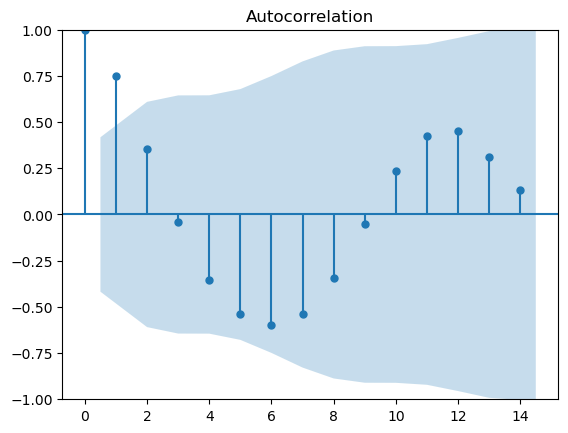

In [30]:
plot_acf(acf_plot);

In [31]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

In [32]:
pacf_plot=pacf(newdata.dropna())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


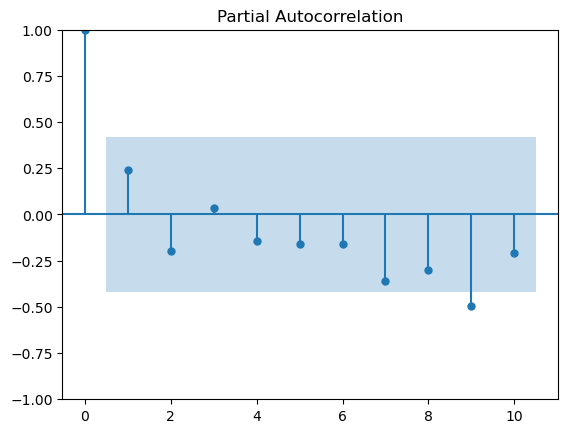

In [33]:
plot_pacf(pacf_plot,lags=10);

In [34]:
train=newdata.iloc[:120]['#Passengers']
test=newdata.iloc[120:]['#Passengers']

In [55]:
1594968.28+1492418.14


3087386.42

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
model=ARIMA(train,order=(1,1,2))
model_fit=model.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
newdata["predict"] = model_fit.predict(start= len(train), end = len(train) + len(test), dynamic = True)

# start=len(train) indicates that the prediction should start from the index immediately following the last index of the training data.

# end=len(train)+len(test)-1 sets the end index for the prediction range. len(train)+len(test) represents the total length of 
# both the training and test data, and subtracting 1 ensures that the prediction ends at the last index of the test data.

# dynamic=True suggests that the predictions are made dynamically, meaning that each prediction uses the previously predicted value 
# as input for the next prediction, rather than using the actual values from the test data.

In [38]:
newdata.head()


,#Passengers,predict
Month,,
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,NaN
1950-03-01,0.099416,NaN
1950-04-01,0.052142,NaN


<Axes: xlabel='Month'>

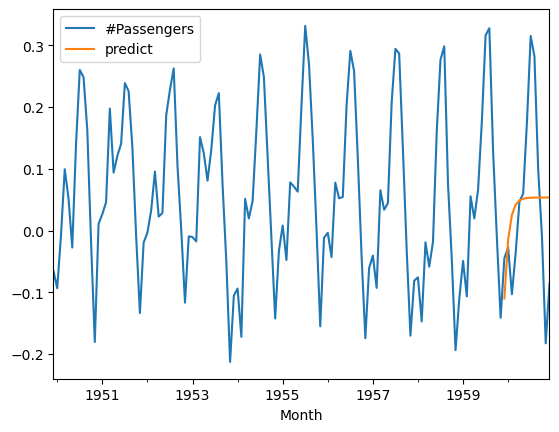

In [39]:
newdata[["#Passengers",'predict']].plot()

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [41]:
model1=SARIMAX(train,order=(1,1,2),seasonal_order=(1,1,2,12))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
model1_fit=model1.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
newdata['SARIMAX']=model1_fit.predict(start=len(train),end=len(train)+len(test),dynamic=True)

<Axes: xlabel='Month'>

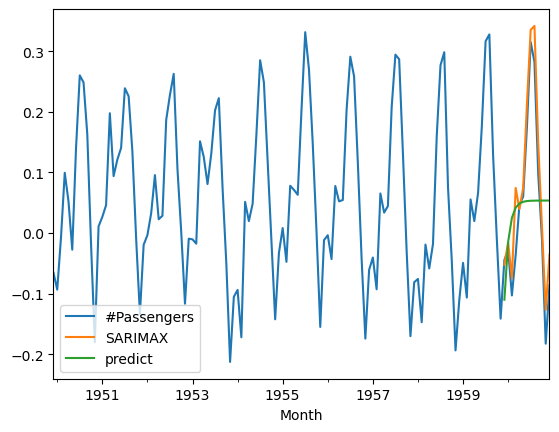

In [44]:
newdata[["#Passengers",'SARIMAX','predict']].plot()

In [50]:
forecast

1959-12-01   -0.052251
1960-01-01   -0.015640
1960-02-01   -0.074885
1960-03-01    0.074436
1960-04-01    0.039479
                ...   
1969-07-01    0.496475
1969-08-01    0.503023
1969-09-01    0.309746
1969-10-01    0.171422
1969-11-01    0.034449
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64

<Axes: xlabel='Month'>

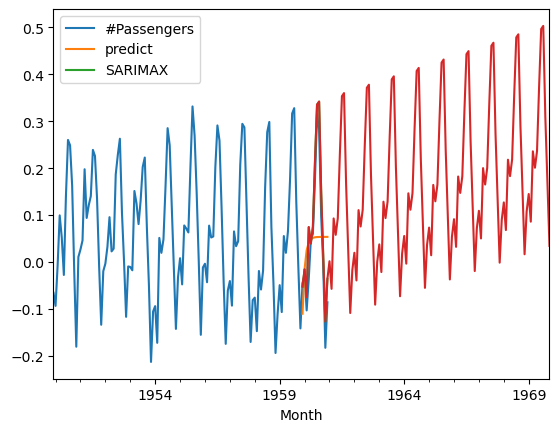

In [45]:
forecast=model1_fit.forecast(steps=120)
newdata.plot()
forecast.plot()


In [46]:
from sklearn.metrics import mean_squared_error
import itertools
import numpy as np
p=range(0,9)
d=range(0,2)
q=range(0,9)
rmse=[]
values=[]
pdq_combination=list(itertools.product(p,d,q))
for col in pdq_combination:
    model=ARIMA(train,order=col)
    model_fit=model.fit()
    predicted=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
    error=np.sqrt(mean_squared_error(test,predicted))
    rmse.append(error)
    values.append(col)
new_df1=pd.DataFrame(index=values,data=rmse,columns=['rmse'])    
new_df2=new_df1.sort_values('rmse')
new_df2

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

,rmse
"(8, 1, 8)",0.040691
"(8, 0, 6)",0.044292
"(8, 0, 5)",0.045369
"(8, 0, 8)",0.046357
"(7, 1, 7)",0.048653
...,...
"(2, 1, 0)",0.217930
"(0, 1, 0)",0.228469
"(1, 1, 1)",0.240002
"(0, 1, 1)",0.252661


In [47]:
new_df2=new_df1.sort_values('rmse')
new_df2

,rmse
"(8, 1, 8)",0.040691
"(8, 0, 6)",0.044292
"(8, 0, 5)",0.045369
"(8, 0, 8)",0.046357
"(7, 1, 7)",0.048653
...,...
"(2, 1, 0)",0.217930
"(0, 1, 0)",0.228469
"(1, 1, 1)",0.240002
"(0, 1, 1)",0.252661


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

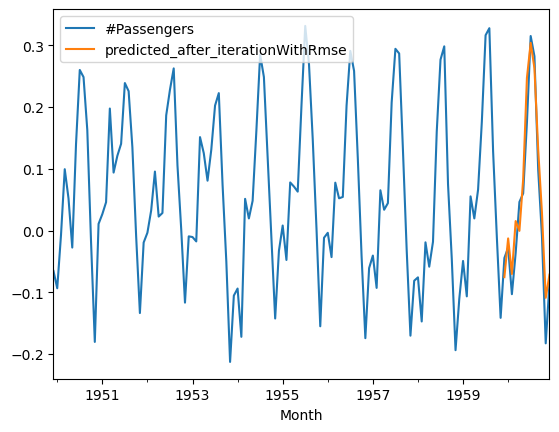

In [48]:
model2=ARIMA(train,order=(8,1,8))
model_fit=model2.fit()
newdata['predicted_after_iterationWithRmse']=model_fit.predict(start=len(train),end=len(train)+len(test),dynamic=True)
newdata[['#Passengers','predicted_after_iterationWithRmse']].plot()


<Axes: xlabel='Month'>

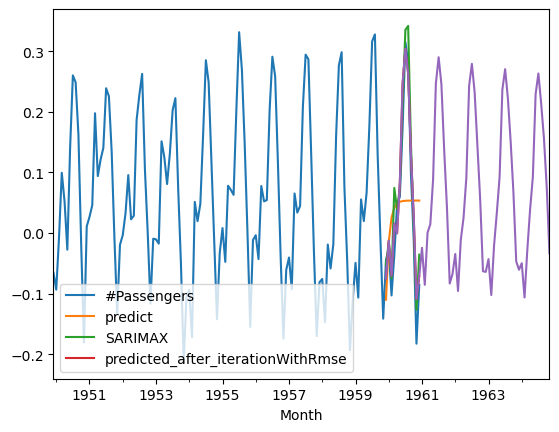

In [49]:
forecast1=model_fit.forecast(steps=60)
newdata.plot()
forecast1.plot()